## Installing Required Libraries

In [ ]:
#!conda install -c conda-forge pickle5
!pip install joblib

In [ ]:
!pip install keras-tuner
!pip install tensorflow

## Adding Required Libraries

In [ ]:
import math
import pandas as pd
import tensorflow as tf
import keras_tuner.tuners as kt
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
#from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix,accuracy_score,precision_recall_fscore_support

In [ ]:
import joblib

## Uploading CICIDS2017 dataset into Pandas Dataframe

In [ ]:
pd.set_option('mode.use_inf_as_na', True)


In [ ]:
#df1 =pd.read_csv('dataset.csv')

In [ ]:
df1 = pd.read_csv("MachineLearningCVE.csv", skipinitialspace=True)

In [ ]:
df1.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [ ]:
df1.dropna(inplace=True)
df = df1.drop(['Fwd Header Length.1'],axis=1)

In [ ]:
df.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [ ]:
df

## Splitting the Dataset in Train_Test Dataframes

In [ ]:
X = df.drop(['Label'],axis=1)
y = df.iloc[:, -1].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)


In [ ]:
y_test

array([['DoS Hulk'],
       ['BENIGN'],
       ['BENIGN'],
       ...,
       ['BENIGN'],
       ['BENIGN'],
       ['BENIGN']], dtype=object)

## Scaling the Dataframes created using MinMax Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def scale_datasets(x_train, x_test):
  """
  Standard Scale test and train data
  """
  standard_scaler = MinMaxScaler()
  x_train_scaled = pd.DataFrame(
      standard_scaler.fit_transform(x_train),
      columns=x_train.columns
  )
  x_test_scaled = pd.DataFrame(
      standard_scaler.transform(x_test),
      columns = x_test.columns
  )
  joblib.dump(standard_scaler, open('autoenc_dimred_Scaler.obj', 'wb'))
  return x_train_scaled, x_test_scaled

x_train_scaled, x_test_scaled = scale_datasets(x_train, x_test)

In [ ]:
x_test_scaled

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.001221,8.201808e-01,0.000027,0.000021,2.410853e-05,1.769005e-05,0.012288,0.000000,0.007480,0.016128,...,0.000009,1.0,0.000009,0.000000,0.000009,0.000009,0.820000,0.000000,0.820000,0.820000
1,0.000809,9.076000e-04,0.000005,0.000007,5.581395e-06,2.807219e-07,0.001450,0.015484,0.006061,0.000000,...,0.000005,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.006760,9.797857e-01,0.000100,0.000058,1.072093e-04,6.793774e-06,0.018896,0.000000,0.010124,0.019078,...,0.000103,1.0,0.001638,0.007396,0.016689,0.000268,0.080148,0.017350,0.083333,0.044843
3,0.001221,7.801500e-04,0.000005,0.000000,9.302326e-07,0.000000e+00,0.000242,0.002581,0.001010,0.000000,...,0.000005,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000809,1.191667e-05,0.000005,0.000007,4.806202e-06,2.288494e-07,0.001249,0.013333,0.005219,0.000000,...,0.000005,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565571,0.835261,7.449456e-01,0.000018,0.000031,9.002326e-04,9.459106e-08,0.467164,0.000000,0.391057,0.727438,...,0.000014,1.0,0.001195,0.000000,0.001195,0.001195,0.733333,0.000000,0.733333,0.733333
565572,0.016694,9.916666e-07,0.000005,0.000007,3.100775e-07,1.830795e-08,0.000081,0.000860,0.000337,0.000000,...,0.000005,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
565573,0.006760,5.152358e-01,0.000100,0.000099,1.528682e-04,8.688647e-06,0.018332,0.000000,0.014436,0.017825,...,0.000103,1.0,0.031139,0.000000,0.031139,0.031139,0.485833,0.000000,0.485833,0.485833
565574,0.001221,9.622527e-01,0.000068,0.000048,3.387597e-05,1.214427e-06,0.017607,0.000000,0.004599,0.015332,...,0.000005,1.0,0.000237,0.000106,0.000440,0.000213,0.085000,0.000305,0.085000,0.084167


In [ ]:
y_test

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
#y_test = y_test.ravel()
y_train= label_encoder.fit_transform(y_train)
y_test= label_encoder.fit_transform(y_test)
joblib.dump(label_encoder, open('autoenc_dimred_labelencoder.obj', 'wb'))

C:\Users\Yudhir\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_test

array([4, 0, 0, ..., 0, 0, 0])

## Performing Label Encoding on the Classes column of the Dataset

In [ ]:
import numpy as np
label_test = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
y_test1= label_encoder.inverse_transform(label_test)
y_test1

array(['BENIGN', 'Bot', 'DDoS', 'DoS GoldenEye', 'DoS Hulk',
       'DoS Slowhttptest', 'DoS slowloris', 'FTP-Patator', 'Heartbleed',
       'Infiltration', 'PortScan', 'SSH-Patator',
       'Web Attack-Brute Force', 'Web Attack-Sql Injection',
       'Web Attack-XSS'], dtype=object)

In [ ]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = ''

In [ ]:
if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")


GPU found


## Creating Autoencoder Architecture for Dimensionality Reduction

In [ ]:
class AutoEncoders(Model):

  def __init__(self, output_units):

    super().__init__()
    self.encoder = Sequential(
        [
          Dense(64, activation="relu"),
          Dense(32, activation="relu"),
          Dense(10, activation="relu")
        ]
    )

    self.decoder = Sequential(
        [
          Dense(32, activation="relu"),
          Dense(64, activation="relu"),
          Dense(output_units, activation="sigmoid")
        ]
    )

  def call(self, inputs):

    encoded = self.encoder(inputs)
    decoded = self.decoder(encoded)
    return decoded

auto_encoder = AutoEncoders(len(x_train_scaled.columns))

auto_encoder.compile(
    loss='mae',
    metrics=['mae'],
    optimizer='adam'
)
with tf.device('/CPU:0'):
    history = auto_encoder.fit(
        x_train_scaled,
        x_train_scaled,
        epochs=10,
        batch_size=64,
        validation_data=(x_test_scaled, x_test_scaled)
    )
#auto_encoder.save('autoencoder.h5')
#auto_encoder.save_weights('Autoenc_weights')

Epoch 1/10
35349/35349 [==============================] - 58s 2ms/step - loss: 0.0096 - mae: 0.0096 - val_loss: 0.0040 - val_mae: 0.0040
Epoch 2/10
35349/35349 [==============================] - 53s 2ms/step - loss: 0.0036 - mae: 0.0036 - val_loss: 0.0035 - val_mae: 0.0035
Epoch 3/10
35349/35349 [==============================] - 53s 2ms/step - loss: 0.0033 - mae: 0.0033 - val_loss: 0.0032 - val_mae: 0.0032
Epoch 4/10
35349/35349 [==============================] - 53s 1ms/step - loss: 0.0032 - mae: 0.0032 - val_loss: 0.0031 - val_mae: 0.0031
Epoch 5/10
35349/35349 [==============================] - 53s 2ms/step - loss: 0.0031 - mae: 0.0031 - val_loss: 0.0030 - val_mae: 0.0030
Epoch 6/10
35349/35349 [==============================] - 52s 1ms/step - loss: 0.0030 - mae: 0.0030 - val_loss: 0.0030 - val_mae: 0.0030
Epoch 7/10
35349/35349 [==============================] - 54s 2ms/step - loss: 0.0030 - mae: 0.0030 - val_loss: 0.0031 - val_mae: 0.0031
Epoch 8/10
35349/35349 [=================

In [ ]:
auto_encoder.save_weights('autoenc_dimreduc_weights',save_format='tf')

## Plotting the Train - Val Loss Graph of the Trained Autoencoder Model

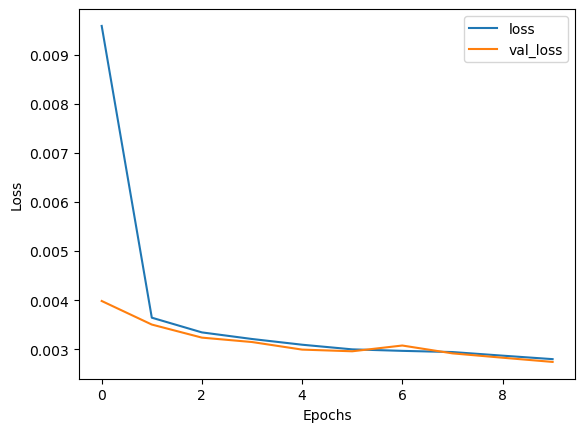

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'])
plt.show()

## Performing Dimensionality Reduction of the Train and Test Datasets using the Autoencoder Model

In [ ]:
with tf.device('/CPU:0'):
    encoder_layer = auto_encoder.get_layer('sequential')
    reduced_df = pd.DataFrame(encoder_layer.predict(x_train_scaled))
    reduced_df = reduced_df.add_prefix('feature_')

70697/70697 [==============================] - 59s 823us/step


In [ ]:
reduced_df

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,3.349962,0.000000,0.0,0.0,1.821732,0.431564,1.745535,2.011762,3.079422,1.180281
1,1.302536,0.000000,0.0,0.0,0.791999,0.000000,1.424944,3.312725,2.357324,1.761962
2,3.444367,0.000000,0.0,0.0,0.695431,0.487062,1.228503,2.738913,2.925140,1.648847
3,0.974886,1.637260,0.0,0.0,0.467640,0.000000,1.493538,2.027963,0.566538,1.523049
4,2.248444,0.000000,0.0,0.0,1.957156,2.377469,0.638579,2.768966,2.021985,2.337039
...,...,...,...,...,...,...,...,...,...,...
2262295,1.027993,1.549933,0.0,0.0,0.521811,0.000000,1.564464,2.141012,0.541539,1.439221
2262296,0.974896,1.634305,0.0,0.0,0.471817,0.000000,1.564312,1.951583,0.560800,1.432959
2262297,0.977151,1.610425,0.0,0.0,0.425690,0.000000,1.765558,2.131276,0.698324,1.692003
2262298,0.712070,0.592999,0.0,0.0,0.156531,0.000000,2.835417,3.542571,0.805759,2.441444


In [ ]:
with tf.device('/CPU:0'):
    encoder_layer = auto_encoder.get_layer('sequential')
    reduced_df_test = pd.DataFrame(encoder_layer.predict(x_test_scaled))
    reduced_df_test = reduced_df_test.add_prefix('feature_')

17675/17675 [==============================] - 15s 823us/step


In [ ]:
reduced_df_test

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,1.492953,0.000000,0.0,0.0,3.641676,1.301171,0.000000,0.643761,0.278076,1.337102
1,0.996212,1.625315,0.0,0.0,0.481560,0.000000,1.500662,2.048157,0.544651,1.483713
2,1.899050,0.000000,0.0,0.0,1.985766,2.525700,0.759520,2.775439,1.399694,2.334919
3,0.425859,0.677410,0.0,0.0,0.166395,0.000000,2.497431,2.839455,0.592766,1.909305
4,1.022910,1.617850,0.0,0.0,0.471158,0.000000,1.581409,2.137832,0.566234,1.541373
...,...,...,...,...,...,...,...,...,...,...
565571,1.279483,0.000000,0.0,0.0,2.294562,1.895143,0.984415,0.143460,0.361034,3.818142
565572,1.148207,0.730124,0.0,0.0,0.000000,0.000000,1.669192,3.045792,1.543854,1.994902
565573,1.837040,0.000000,0.0,0.0,2.261047,0.342975,1.516174,1.610698,1.737141,2.413095
565574,1.813525,0.000000,0.0,0.0,1.822033,2.036384,1.128237,3.148419,2.376811,2.495943


## Training the Dimensionality Reduced Dataframe on Random Forest Model

Random Forest Accuracy:0.9949538169936489
Random Forest precision_recall_fscore:0.99495010857495430.99495381699364890.9949384055074921


C:\Users\Yudhir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


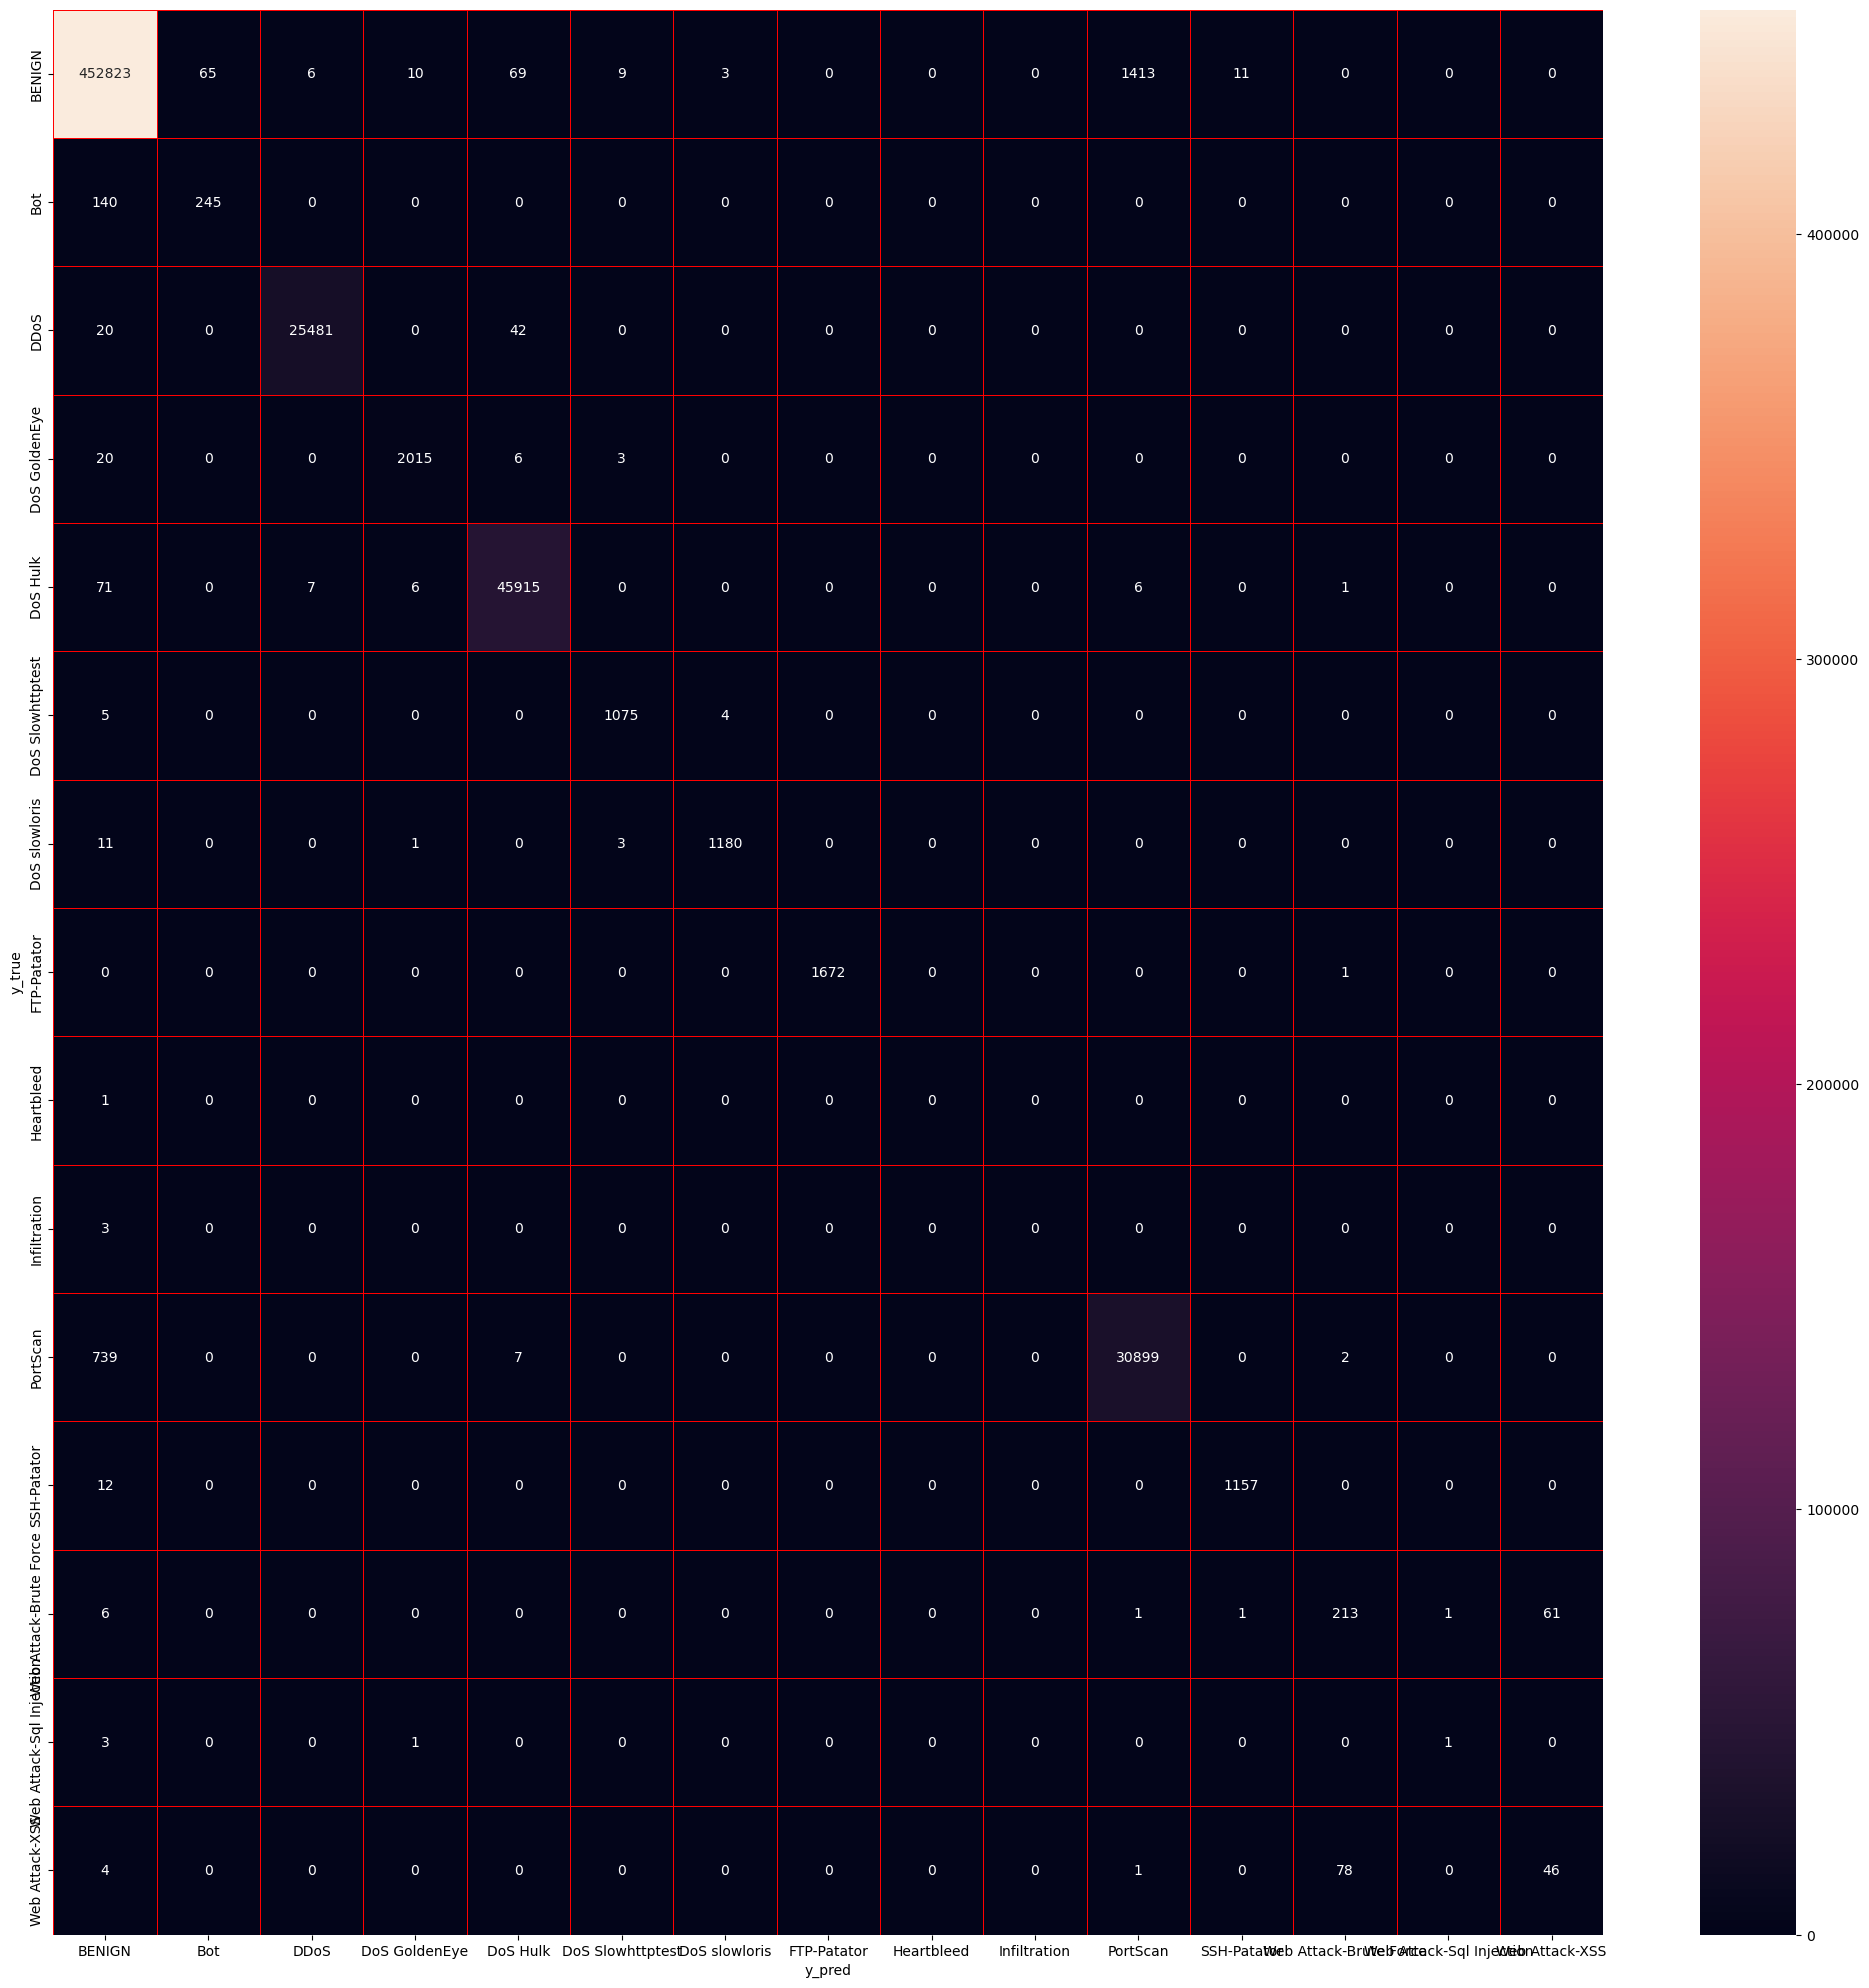

In [ ]:
rf = RandomForestClassifier(random_state = 42)

rf.fit(reduced_df,y_train)
joblib.dump(rf, open('RandomForest.sav', 'wb'))
# filename = 'rf1.sav'
# pickle.dump(rf, open(filename, 'wb'))
rf_score=rf.score(reduced_df_test,y_test)
y_predict=rf.predict(reduced_df_test)
y_true=y_test
print('Random Forest Accuracy:'+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Random Forest precision_recall_fscore:'+(str(precision))+(str(recall))+(str(fscore)))

cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(25,25))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
ax.xaxis.set_ticklabels(['BENIGN', 'Bot', 'DDoS', 'DoS GoldenEye', 'DoS Hulk',
       'DoS Slowhttptest', 'DoS slowloris', 'FTP-Patator', 'Heartbleed',
       'Infiltration', 'PortScan', 'SSH-Patator',
       'Web Attack-Brute Force', 'Web Attack-Sql Injection',
       'Web Attack-XSS']);
ax.yaxis.set_ticklabels(['BENIGN', 'Bot', 'DDoS', 'DoS GoldenEye', 'DoS Hulk',
       'DoS Slowhttptest', 'DoS slowloris', 'FTP-Patator', 'Heartbleed',
       'Infiltration', 'PortScan', 'SSH-Patator',
       'Web Attack-Brute Force', 'Web Attack-Sql Injection',
       'Web Attack-XSS']);
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#print(rf_score,precision,recall,fscore)

In [ ]:
!pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 982.3 kB/s eta 0:00:00


## Training the Dimensionality Reduced Dataframe on LightGBM Model

LightBGM Accuracy:0.9291854675587365
LightBGMRandom Forest precision_recall_fscore:0.92650270008113710.92918546755873650.9277479988118006


C:\Users\Yudhir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


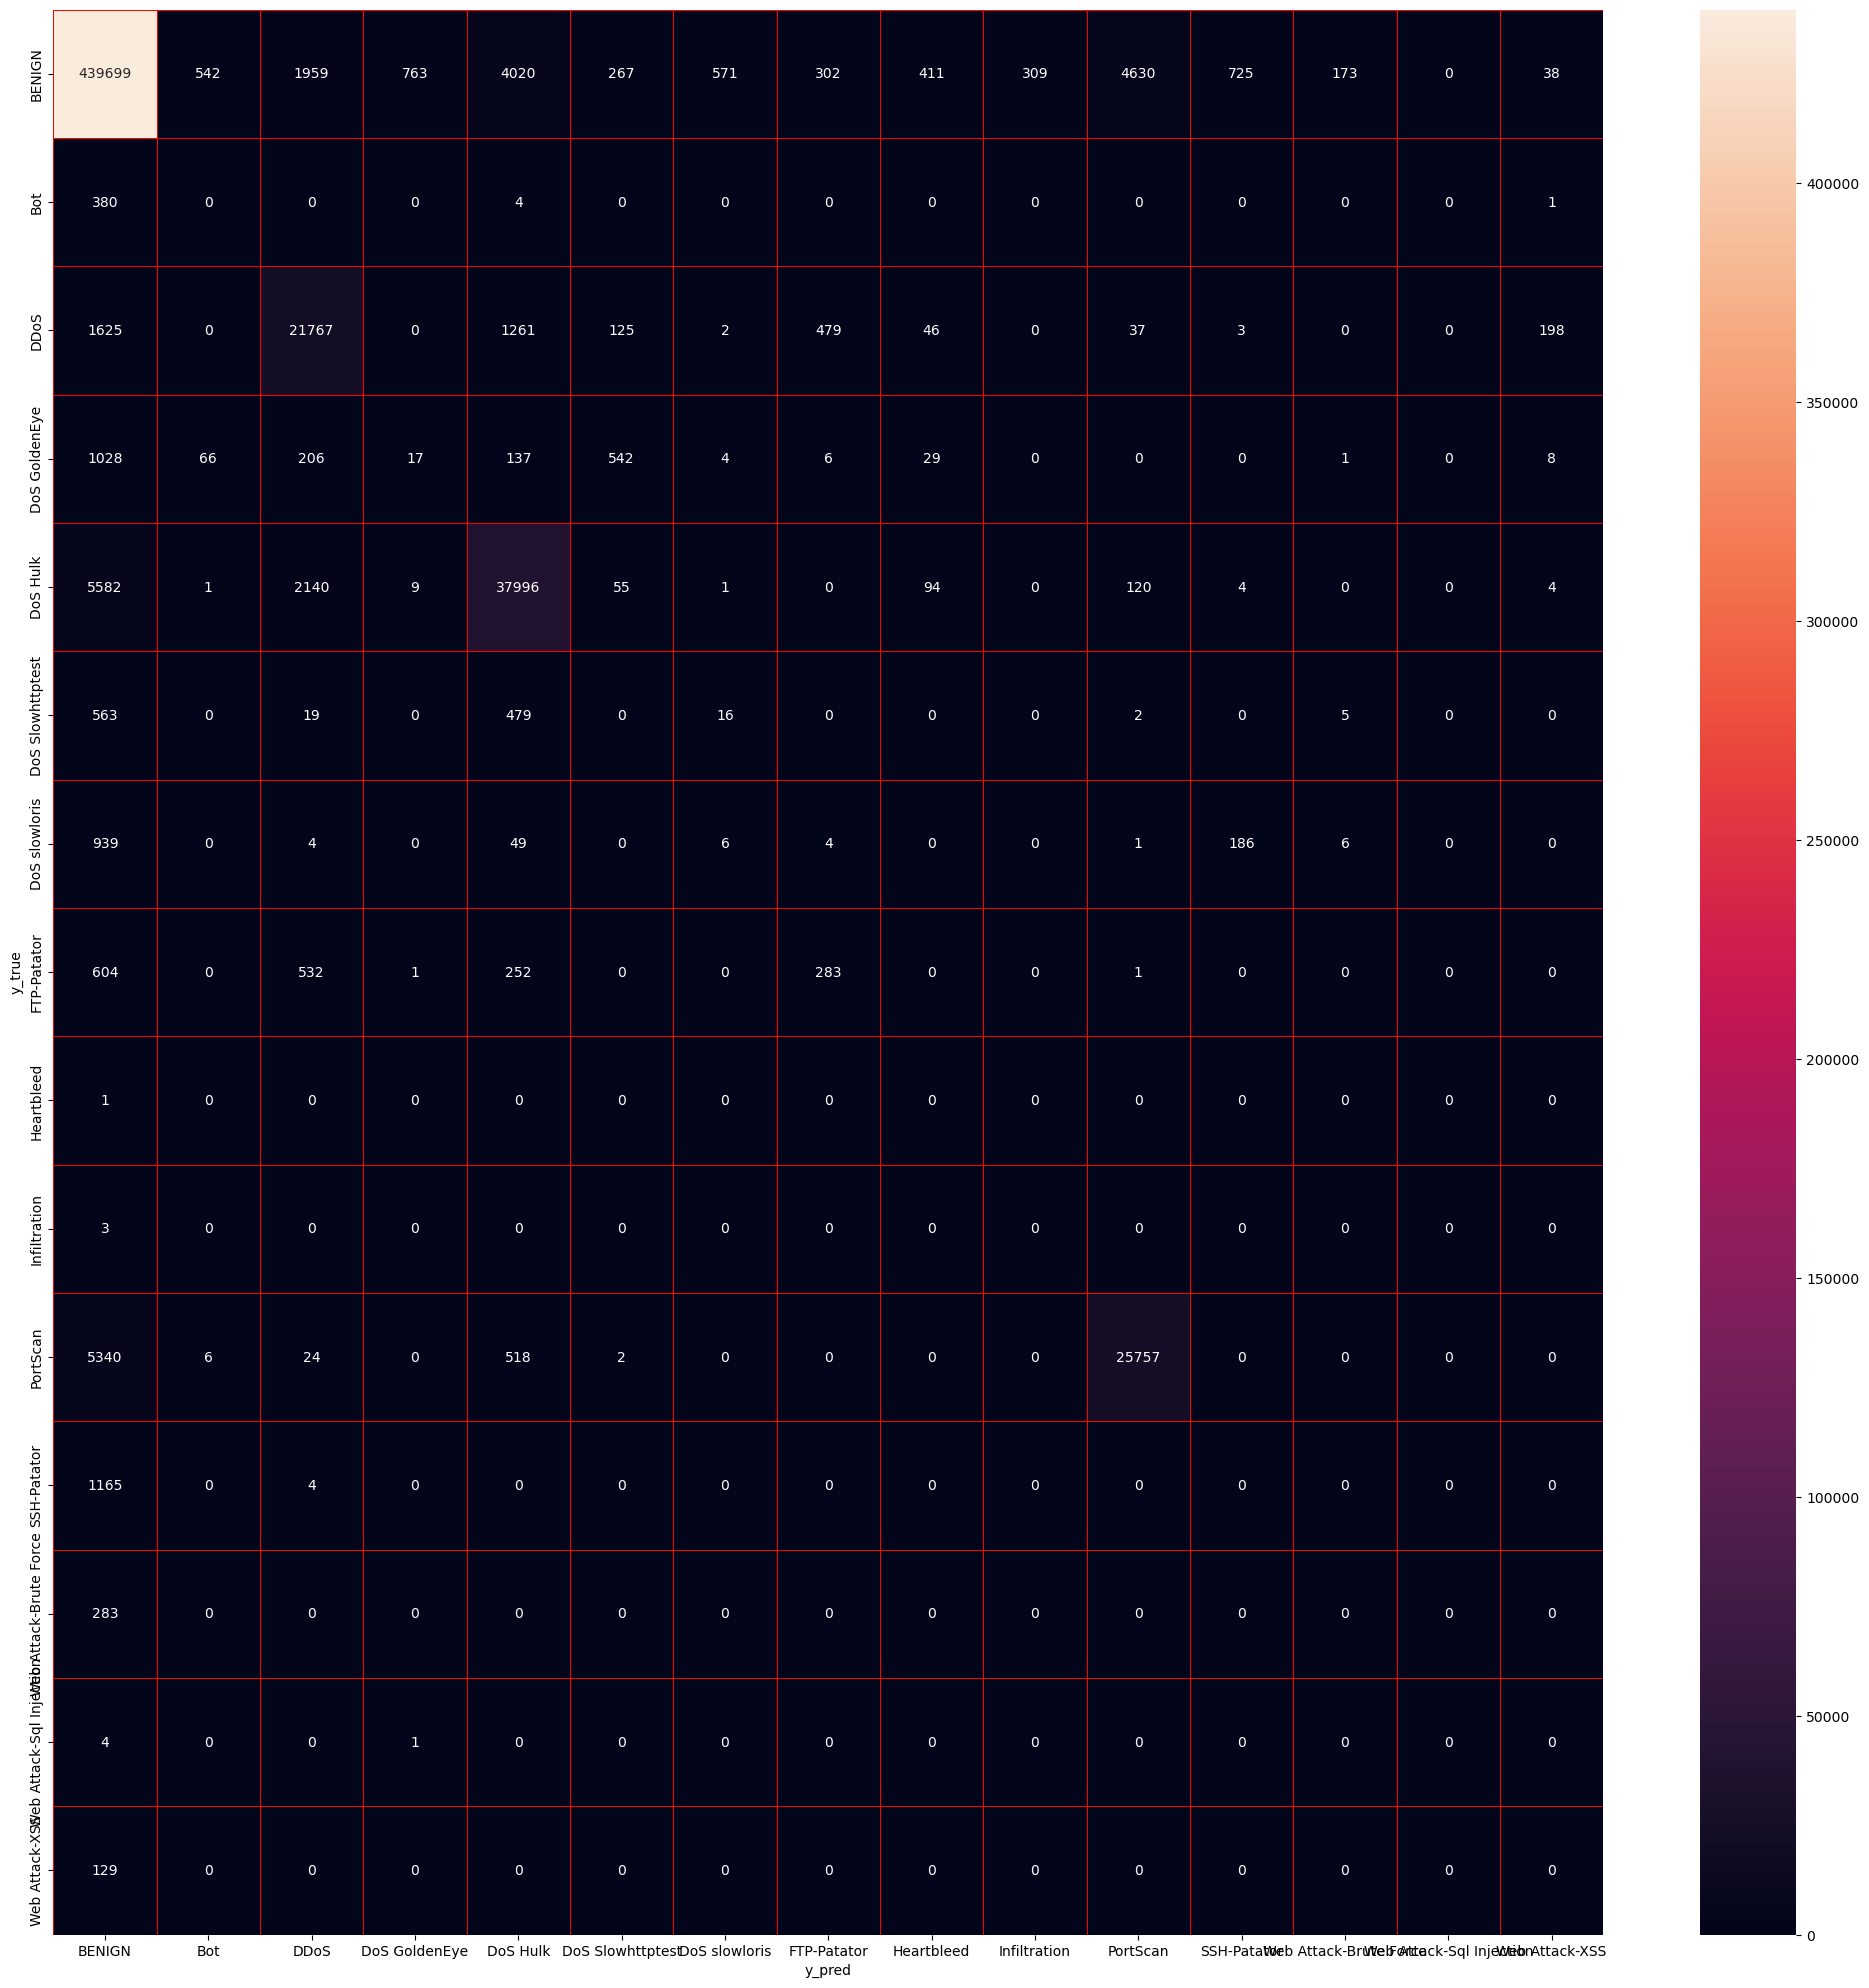

In [ ]:
import lightgbm
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(random_state=0,scale_pos_weight=7)

lgbm.fit(reduced_df,y_train)
joblib.dump(lgbm, open('lightbgmt.sav', 'wb'))
# filename = 'rf1.sav'
# pickle.dump(rf, open(filename, 'wb'))
lgbm_score=lgbm.score(reduced_df_test,y_test)
y_predict=lgbm.predict(reduced_df_test)
y_true=y_test
print('LightBGM Accuracy:'+ str(lgbm_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('LightBGM precision_recall_fscore:'+(str(precision))+(str(recall))+(str(fscore)))

cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(25,25))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
ax.xaxis.set_ticklabels(['BENIGN', 'Bot', 'DDoS', 'DoS GoldenEye', 'DoS Hulk',
       'DoS Slowhttptest', 'DoS slowloris', 'FTP-Patator', 'Heartbleed',
       'Infiltration', 'PortScan', 'SSH-Patator',
       'Web Attack-Brute Force', 'Web Attack-Sql Injection',
       'Web Attack-XSS']);
ax.yaxis.set_ticklabels(['BENIGN', 'Bot', 'DDoS', 'DoS GoldenEye', 'DoS Hulk',
       'DoS Slowhttptest', 'DoS slowloris', 'FTP-Patator', 'Heartbleed',
       'Infiltration', 'PortScan', 'SSH-Patator',
       'Web Attack-Brute Force', 'Web Attack-Sql Injection',
       'Web Attack-XSS']);
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()